<!DOCTYPE html>

<html class="a-no-js" data-19ax5a9jf="dingo" lang="es-es">
<!-- sp:feature:head-start -->
<head>
<script>
   var aPageStart = (new Date()).getTime();
  </script>
<meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<script type="text/javascript">
   var ue_t0=ue_t0||+new Date();
  </script>
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<script type="text/javascript">
   window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.sli
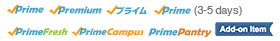

In [22]:
from bs4 import BeautifulSoup
import requests
import datetime
import csv
import pandas as pd
import numpy as np


# · Conectamos a la URL

URL = 'https://www.amazon.es/Apple-24-Pulgadas-Ocho-n%C3%BAcleos-Siete-n%C3%BAcleos-Puertos/dp/B09336DSDS/ref=asc_df_B09336DSDS/?tag=googshopes-21&linkCode=df0&hvadid=469590208017&hvpos=&hvnetw=g&hvrand=1864371232625272788&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=1005476&hvtargid=pla-1272036165330&psc=1'
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.63 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

page = requests.get(URL, headers = headers)

soup1 = BeautifulSoup(page.content, "html.parser")
soup2 = BeautifulSoup(soup1.prettify(),"html.parser")

print (soup2)

In [23]:
def precio_string(precio,decim):
    
  precio_entero=' '.join([str(elem) for elem in precio])
  precio_decimal=' '.join([str(elem) for elem in decim])
  precio_total=precio_entero+','+precio_decimal+'€'

  return precio_total

In [21]:
title = soup2.find(id='productTitle').get_text()

availability = soup2.find(id='availability').get_text()

print(title)

price=soup2.find('span', {'class': 'a-price-whole'}).getText()

precio = []

for p in price:
  if p !='\n' and p!=' ' and p!=',':
    precio.append(p)

decimal=soup2.find('span', {'class': 'a-price-fraction'}).getText()
decim = []

for d in decimal:
  if d!='\n' and d!=' ' and d!=',':
    decim.append(d)

print(availability)

print(precio_string(precio,decim))


           2021 Apple iMac (de 24 Pulgadas, Chip M1 de Apple con CPU de Ocho núcleos y GPU de Siete núcleos, Dos Puertos, 8 GB RAM, 256 GB) - Azul
          


                       En stock.
                      


1 . 2 9 9,0 0€


In [5]:
#clean the title and price

title = title.strip()[:34]
price = price.strip()[1:]
availability = availability.strip()[:8]
print(title) 
print(precio_string(precio,decim))
print(availability)

2021 Apple iMac (de 24 Pulgadas, C
1 . 2 9 9,0 0€
En stock


In [6]:
#check data type
print(type(title))
print(type(precio_string(precio,decim)))
print(type(availability))

<class 'str'>
<class 'str'>
<class 'str'>


In [9]:
today = datetime.date.today()
print(today)
print(type(today))

2022-03-30
<class 'datetime.date'>


In [10]:
header = ['Product Title', 'Price', 'Availability','Date'] #creamos una lista con la cabecera
data = [title, precio_string(precio,decim), availability, today]
print(type(header))
print(type(data))
print(data)

<class 'list'>
<class 'list'>
['2021 Apple iMac (de\xa024\xa0Pulgadas, C', '1 . 2 9 9,0 0€', 'En stock', datetime.date(2022, 3, 30)]


In [13]:
with open('AmazonData.csv', 'w', newline='', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerow(data)

In [16]:
df = pd.read_csv(r'AmazonData.csv')
df.head()

,Product Title,Price,Availability,Date
0,"2021 Apple iMac (de 24 Pulgadas, C","1 . 2 9 9,0 0€",En stock,2022-03-30


In [17]:
with open('AmazonData.csv', 'a+', newline='', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(data)

In [18]:
df

,Product Title,Price,Availability,Date
0,"2021 Apple iMac (de 24 Pulgadas, C","1 . 2 9 9,0 0€",En stock,2022-03-30
